# Hodel Data Exploration

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

test.csv
train.csv



## Load train data

In [3]:
train = pd.read_csv('input/train.csv',
                    dtype={'is_booking':bool, 'srch_destination_id':np.int32, 'hotel_cluster':np.int32},
                    parse_dates=['date_time', 'srch_ci', 'srch_co'],
                    nrows=10000)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null datetime64[ns]
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int32
srch_destination

## Data Exploration

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

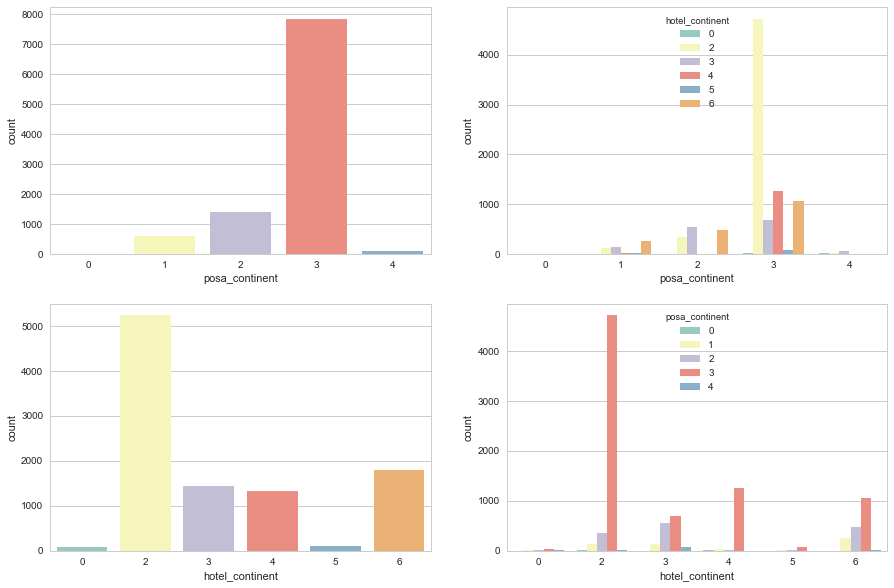

In [6]:
# Plot frequency for posa and hotel continent
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))
sns.countplot('posa_continent', data=train, palette="Set3", ax=axis1)
sns.countplot('posa_continent', data=train, hue='hotel_continent', palette="Set3", ax=axis2)
sns.countplot('hotel_continent', data=train, palette="Set3", ax=axis3)
sns.countplot('hotel_continent', data=train, hue='posa_continent', palette="Set3", ax=axis4)

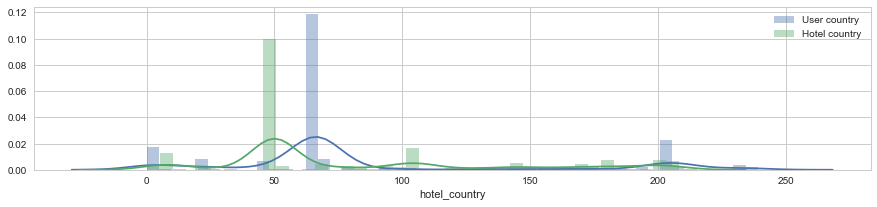

In [7]:
# Difference between user and destination country
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

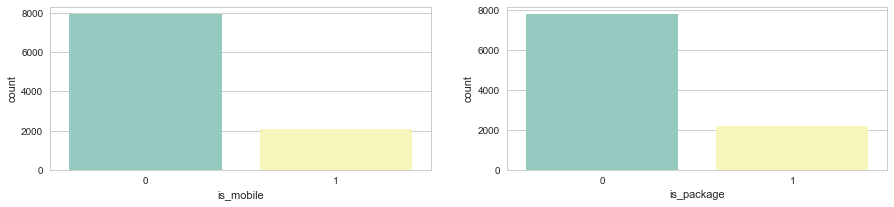

In [8]:
# Plot frequency of is_mobile & is_package
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))
sns.countplot('is_mobile',data=train, palette="Set3", ax=axis1)
sns.countplot('is_package',data=train, palette="Set3", ax=axis2)

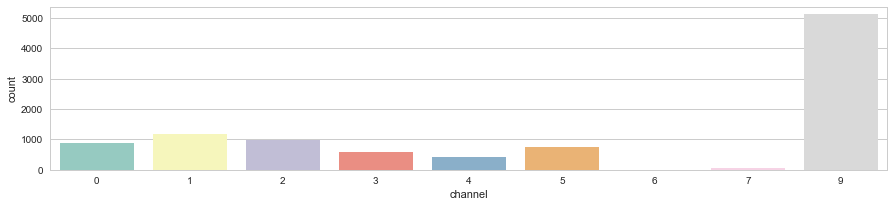

In [9]:
# Plot the most impactful channel
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.countplot(x='channel', data=train, palette="Set3")

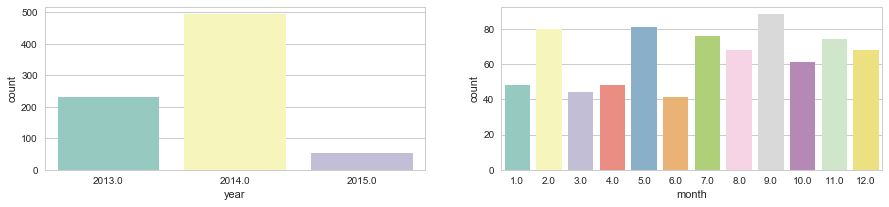

In [10]:
# Parsing to year, month
train['year'] = train['srch_ci'].apply(lambda x: x.year)
train['month'] = train['srch_ci'].apply(lambda x: x.month)

# Plot frequency of booking in each month
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))
sns.countplot('year', data=train[train['is_booking']==1], palette="Set3", ax=axis1)
sns.countplot('month', data=train[train['is_booking']==1], palette="Set3", ax=axis2)

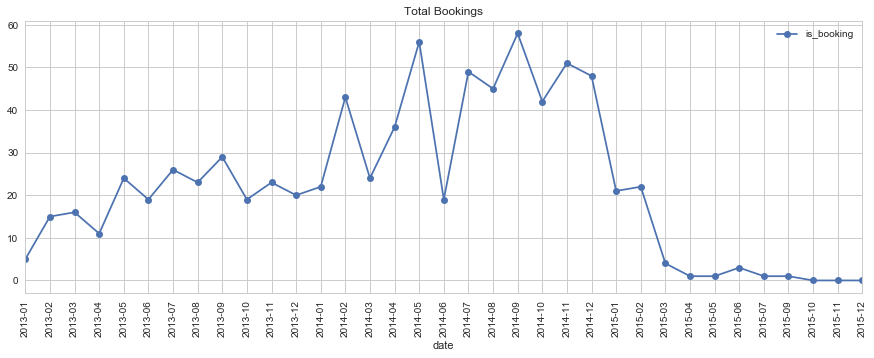

In [12]:
# Convert srch_ci column to Date(Y-M)
train['date']  = train['srch_ci'].apply(
    lambda x: (datetime.datetime.strftime(x, '%Y-%m') if not pd.isnull(x) else np.nan)
)

# Plot number of bookings over Date
date_bookings  = train.groupby('date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True, marker='o', title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

## Insights
- 3번 대륙 사람들은 여행을 많이 떠난다 (사람이 많거나 부자일 가능성이 높음: 아마 중국)
- 2번 대륙은 호텔이 많다 (관광으로 먹고 사는 대륙: 아마 유럽이 아닐까)
- 아직까지는 모바일 사용자보다 웹 사용자가 약 4배 더 많다
- 패키지 여행보다 자유여행하는 사람이 약 4배 더 많다
- 마케팅 채널은 9번이 압도적이다 (아마 페이스북이 아닐까)
- 호텔 투숙객은 대부분 1~2명이고 아이는 안데리고 다니는 편이다
- 목적지 유형은 1번과 6번이 대다수를 차지한다